# WK03: Models

## Setup

This code imports the functions we need to run our inference pipelines

In [9]:
!pip install Pillow

Defaulting to user installation because normal site-packages is not writeable


In [11]:
from PIL import Image
from transformers import pipeline

### Text Completion

Let's use the GPT2 model to create some text completions:

In [12]:
TEXT_GEN_MODEL = "openai-community/gpt2"

Here we define some phrases that we'll use as sentence starters:

In [13]:
SEED_TEXTS = [
  "How much wood would a woodchuck chuck if ",
  "I once knew a man from Natucket, who ",
  "To be or not to be, "
]

We'll use a Transformers pipeline object to run inference:

In [15]:
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

Device set to use cpu


In [18]:
generator("To be or not to be, that")

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[{'generated_text': 'To be or not to be, that was the day when the little girl was given a special gift. She was so excited to open it'}]

Here we run the generator on all starter phrases:

In [19]:
for t in SEED_TEXTS:
  result = generator(t, max_length=24, pad_token_id=0)
  print(result[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if 3 year old Timmy wanted to help. He was
I once knew a man from Natucket, who 3-years-old Jack. He was a
To be or not to be, 3 year old Jack was playing in the park. He saw a big,


#### Changing Model

is as easy as:

In [20]:
TEXT_GEN_MODEL = "Xenova/llama2.c-stories110M"
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

Device set to use cpu


In [21]:
generator("Hi, I'm Winnie the Pooh, ")

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[{'generated_text': "Hi, I'm Winnie the Pooh, 3 year old. She was very excited because today was the day she was going to the park with"}]

Rerun with new model:

In [22]:
for t in SEED_TEXTS:
  result = generator(t, max_length=32, pad_token_id=0)
  print(result[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if 3 year old Timmy wanted to help. He was only three years old, but he was
I once knew a man from Natucket, who 3-years-old Jack. He was a very kind man and he always had a
To be or not to be, 3 year old Jack was playing in the park. He saw a big, red ball and he wanted to play with


In [25]:
generator("Hi, I'm Winnie the Pooh, the cutest bear in the world. ", max_length=132)

[{'generated_text': "Hi, I'm Winnie the Pooh, the cutest bear in the world.  I'm a big fan of the Disney animated series, and I'm a huge fan of the Disney animated series.  I'm a big fan of the Disney animated series, and I'm a big fan of the Disney animated series.  I'm a big fan of the Disney animated series, and I'm a big fan of the Disney animated series.  I'm a big fan of the Disney animated series, and I'm a big fan of the Disney animated series.  I'm a big fan of the Disney animated series, and I'm a big"}]

One last model:

In [26]:
TEXT_GEN_MODEL = "facebook/opt-125m"
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

for t in SEED_TEXTS:
  result = generator(t, max_length=32, pad_token_id=0)
  print(result[0]["generated_text"])

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if  he had a woodchuck?
I think he would chuck it.
I once knew a man from Natucket, who  was a very nice guy, but he was a bit of a jerk. He was a bit of
To be or not to be,  I'm not sure what you mean by "not to be".  I'm not sure what you mean by "


In [28]:
generator("Hi, I'm Winnie the Pooh, the cutest bear in the world. ", max_length=132)

[{'generated_text': "Hi, I'm Winnie the Pooh, the cutest bear in the world.  I'm a big fan of the Disney animated series, and I'm a huge fan of the Disney animated series.  I'm a big fan of the Disney animated series, and I'm a big fan of the Disney animated series.  I'm a big fan of the Disney animated series, and I'm a big fan of the Disney animated series.  I'm a big fan of the Disney animated series, and I'm a big fan of the Disney animated series.  I'm a big fan of the Disney animated series, and I'm a big"}]

### Text Sentiment Analysis

Define model and create some example phrases:

In [29]:
TEXT_SENT_MODEL = "joeddav/distilbert-base-uncased-go-emotions-student"

EXAMPLE_TEXTS = [
  "What a wonderful day",
  "OMG my head hurts",
  "What am I doing here?"
]

Create inference pipeline object:

In [30]:
analyzer = pipeline("sentiment-analysis", model=TEXT_SENT_MODEL)

config.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Run on example phrases

In [31]:
for t in EXAMPLE_TEXTS:
  result = analyzer(t)
  print(t, "->", result[0]["label"])

What a wonderful day -> joy
OMG my head hurts -> sadness
What am I doing here? -> confusion


We can also define our pipeline like this if we want to get scores for all possible sentiments:

In [32]:
full_analyzer = pipeline("sentiment-analysis", model=TEXT_SENT_MODEL, return_all_scores=True)

Device set to use cpu
/home/vscode/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [33]:
for t in EXAMPLE_TEXTS:
  result = full_analyzer(t)
  sorted_result = sorted(result[0], key=lambda A: A["score"], reverse=True)
  top_3_labels = [s["label"] for s in sorted_result[:3]]
  print(t, "->", top_3_labels)

What a wonderful day -> ['joy', 'optimism', 'excitement']
OMG my head hurts -> ['sadness', 'grief', 'disgust']
What am I doing here? -> ['confusion', 'curiosity', 'embarrassment']


### Image Description

New model definition/location:

In [34]:
IMAGE_CAP_MODEL = "Salesforce/blip-image-captioning-base"

A test image:

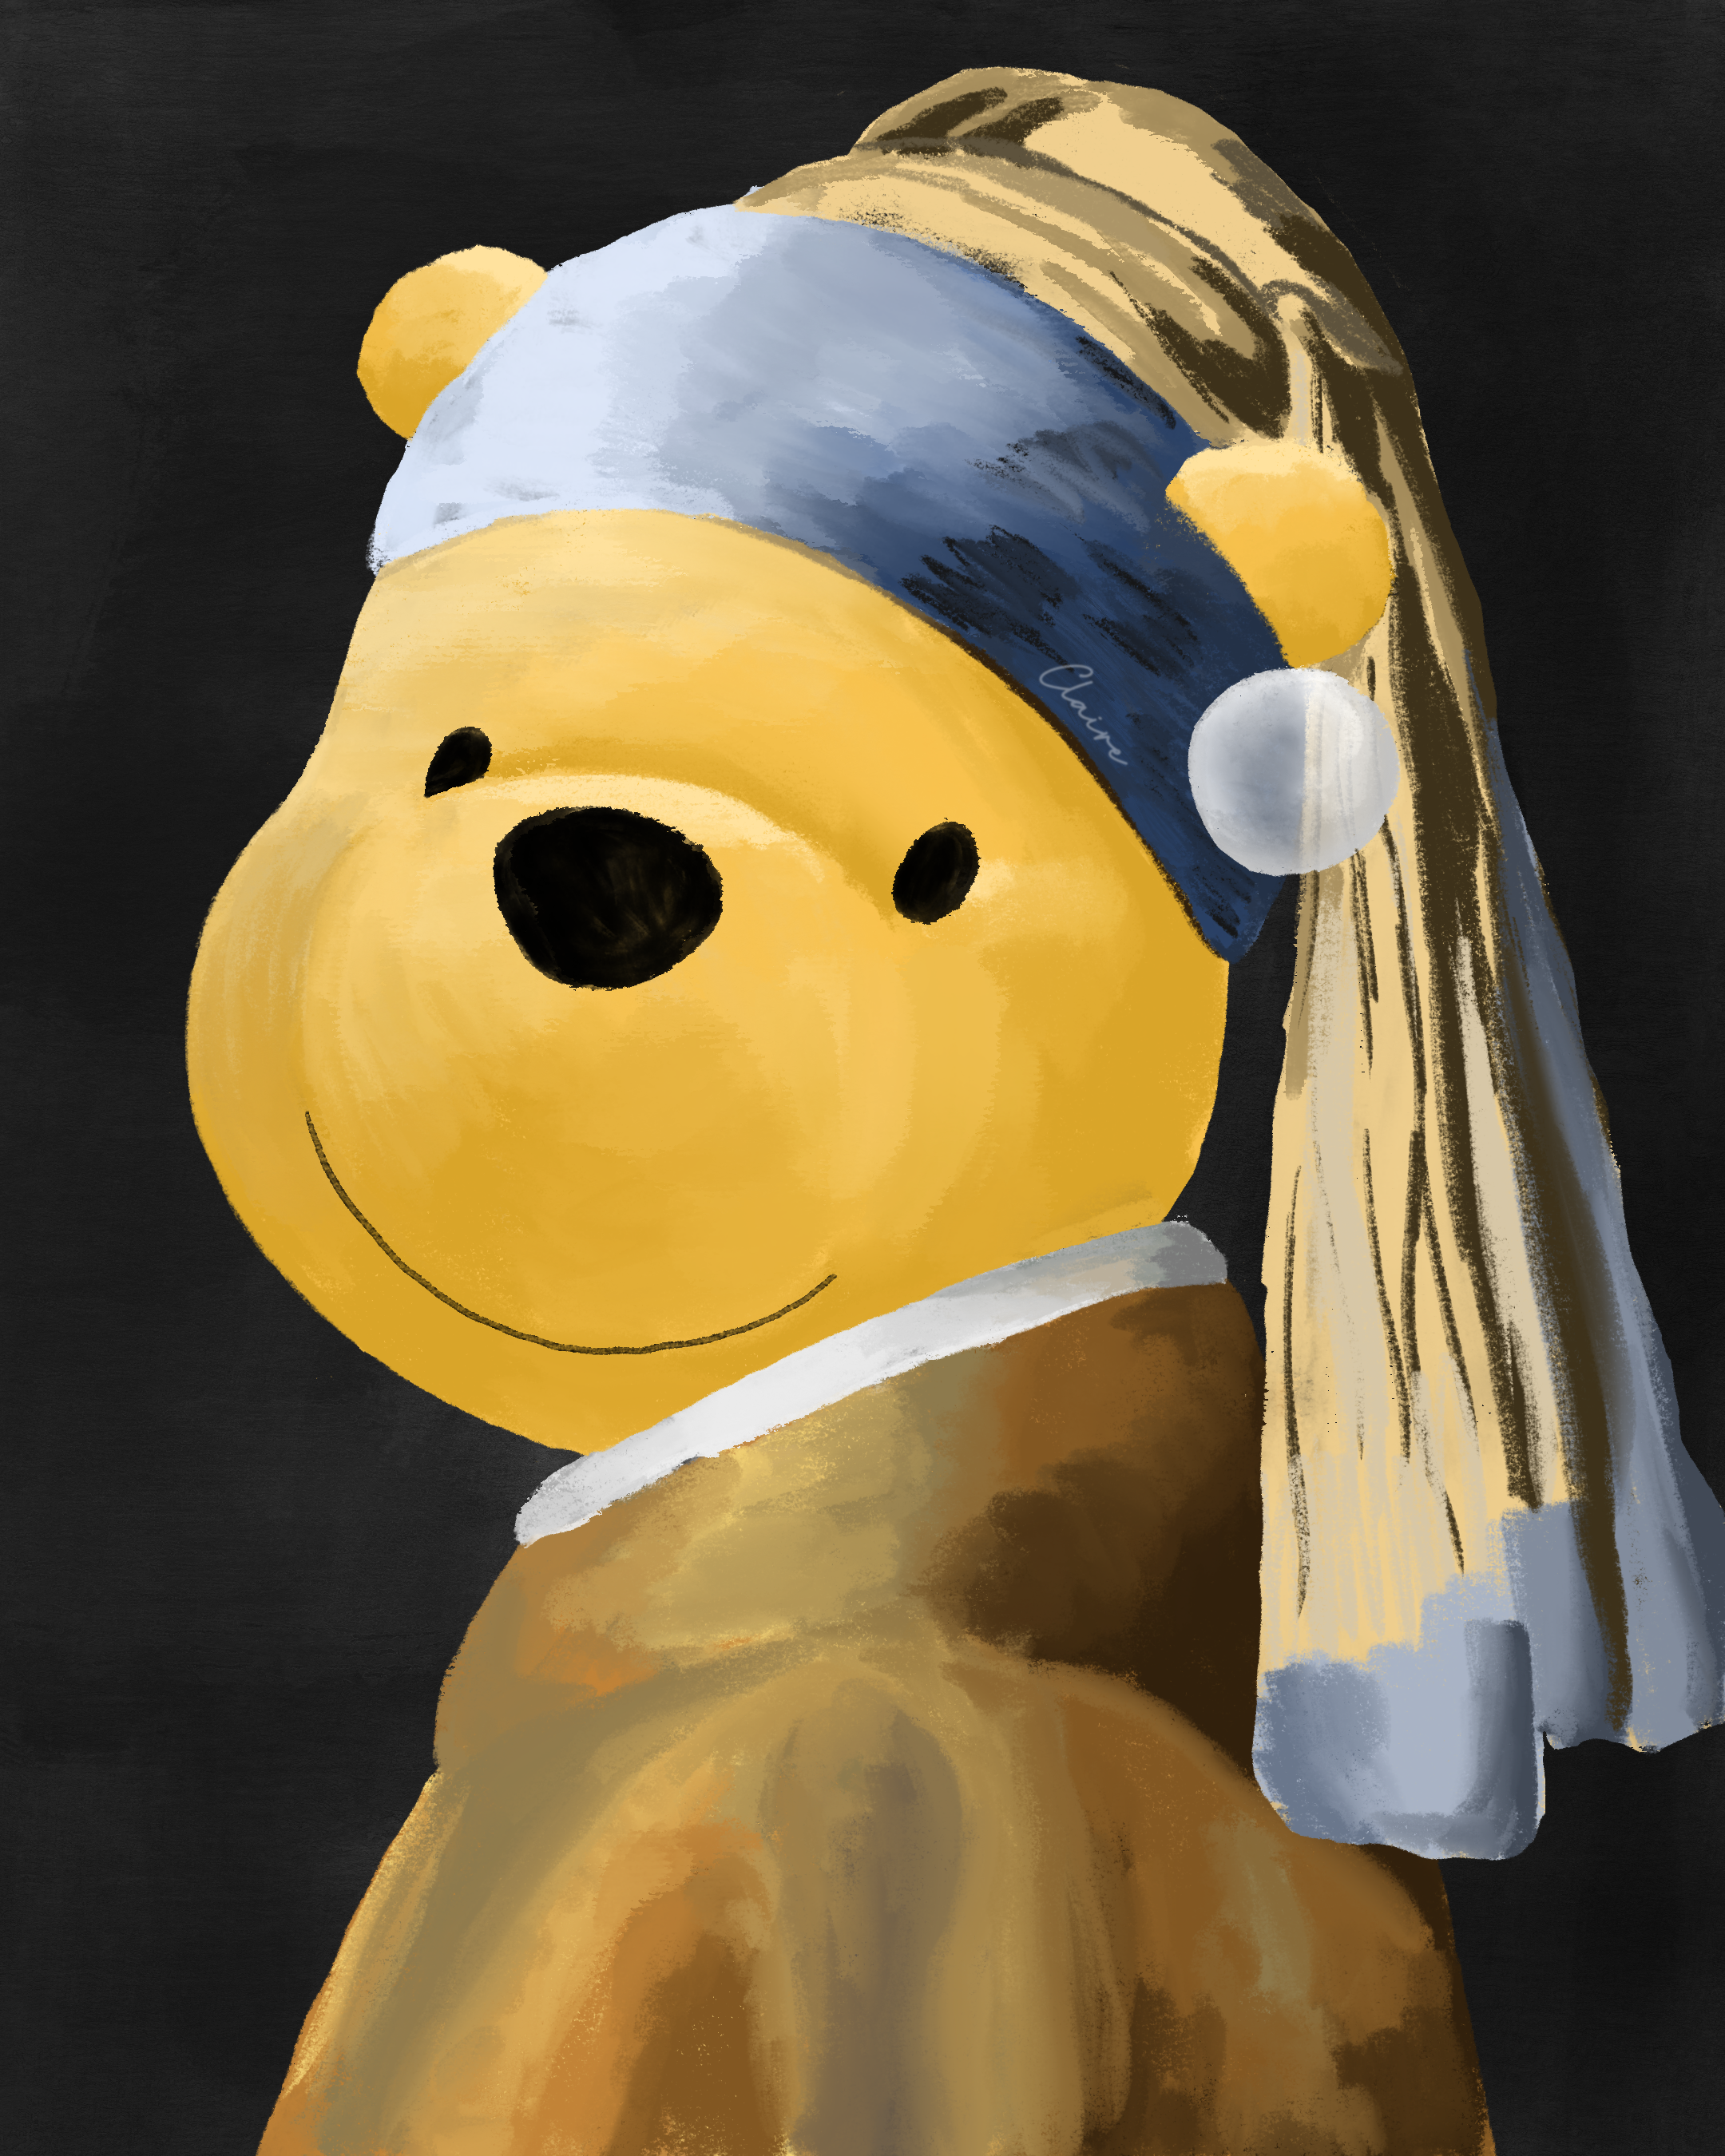

In [38]:
# test_image = Image.open("./imgs/GDTM.jpg").convert("RGB")
test_image = Image.open("./imgs/PoohWithAPearlEarring.png").convert("RGB")
display(test_image)

The inference object:

In [36]:
img_captioner = pipeline(task="image-to-text", model=IMAGE_CAP_MODEL)

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


Run inference:

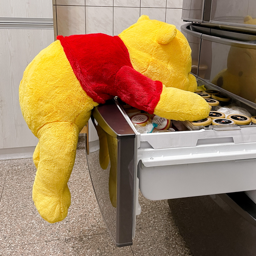

a stuffed bear sitting on a stove


In [57]:
test_image = Image.open("./imgs/image63.png").convert("RGB")
result = img_captioner(test_image)
width, height = test_image.size
ratio = width / height
new_width = 256
new_height = round(new_width / ratio)
resized_image = test_image.resize((new_width, new_height))
display(resized_image)
print(result[0]["generated_text"])

Other image description models:
- [`LLAVA`](https://huggingface.co/llava-hf/llava-interleave-qwen-0.5b-hf)
- [`VIT`](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning)